In [1]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [01:34<00:00, 23.5MB/s]
100% 1.98G/1.98G [01:34<00:00, 22.5MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Initialize data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [11]:
# Prepare train and validation datasets
train_generator = datagen.flow_from_directory(
    directory = '/content/train',
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 2510 images belonging to 36 classes.


In [13]:
validation_generator = datagen.flow_from_directory(
    directory = '/content/validation',
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 63 images belonging to 36 classes.


In [17]:
#model creation
model = Sequential()

model.add(Conv2D(32, kernel_size =(3, 3),padding = 'valid', activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding = 'valid'))

model.add(Conv2D(64, kernel_size =(3, 3),padding = 'valid', activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding = 'valid'))

model.add(Conv2D(128, kernel_size =(3, 3),padding = 'valid', activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding = 'valid'))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 64)        256       
 chNormalization)                                                
                                                      

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
#train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
 4/78 [>.............................] - ETA: 7s - loss: -667.6365 - accuracy: 0.0156  

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


78/78 [==============================] - 67s 753ms/step - loss: -53692.0312 - accuracy: 0.0242 - val_loss: -33627.6328 - val_accuracy: 0.0312
Epoch 2/10
78/78 [==============================] - 56s 717ms/step - loss: -382536.8750 - accuracy: 0.0242 - val_loss: -396541.1562 - val_accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 57s 737ms/step - loss: -1255375.2500 - accuracy: 0.0242 - val_loss: -1145008.0000 - val_accuracy: 0.0312
Epoch 4/10
78/78 [==============================] - 56s 705ms/step - loss: -2965122.7500 - accuracy: 0.0242 - val_loss: -3284076.7500 - val_accuracy: 0.0312
Epoch 5/10
78/78 [==============================] - 56s 717ms/step - loss: -5786536.5000 - accuracy: 0.0242 - val_loss: -4705617.0000 - val_accuracy: 0.0312
Epoch 6/10
78/78 [==============================] - 57s 725ms/step - loss: -10002564.0000 - accuracy: 0.0242 - val_loss: -11309524.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 56s 722ms/ste

In [21]:
import cv2
import matplotlib.pyplot as plt

In [24]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

2/2 [==============================] - 2s 950ms/step - loss: -60475248.0000 - accuracy: 0.0159
Validation Accuracy: 1.59%


Text(0.5, 1.0, 'Training and Validation Accuracy')

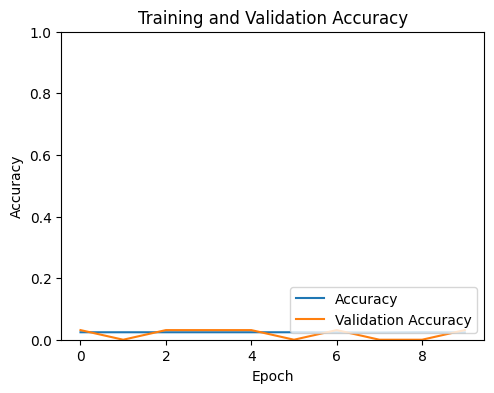

In [25]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

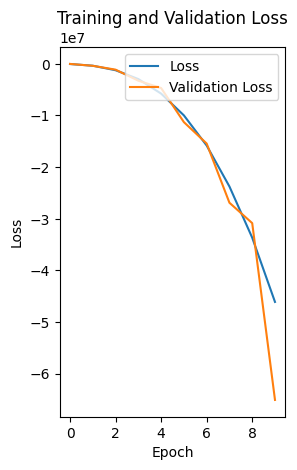

In [26]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The project demonstrated the effectiveness of convolutional neural networks for image classification tasks, specifically in distinguishing between fruits and vegetables. By systematically preparing the data, building and training the model, and evaluating its performance, we established a baseline approach that can be further refined and improved upon with additional techniques and experimentation.